<a href="https://colab.research.google.com/github/nalymugwe/The-MLC-Projects/blob/main/Android_Malware_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Import Data And Preprocessing

In [2]:
#check working directory
!pwd


/content


In [3]:
# Mount colab onto Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Import OS and see list of files
import os
os.chdir('/content/gdrive/MyDrive/Data Science/MLC 30Day ML Aug Challenge/Android App Malware Detection Files')
!ls

Mounted at /content/gdrive
'Android Malware Detection.ipynb'
'Android Malware Detection using meta-information.pdf'
 Android_Permission.csv
'Dataset Details.pdf'
 logs.log
 n_estimators_vs_learning_rate.png
 Report.html


In [4]:
# Import the data
Data = pd.read_csv('/content/gdrive/MyDrive/Data Science/MLC 30Day ML Aug Challenge/Android App Malware Detection Files/Android_Permission.csv')
Data.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fo

# Exploratory Data Analysis

In [5]:
Data.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
count,29999.000000,2.999900e+04,29999.000000,29795.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.0,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,...,

In [6]:
# get info on the data
pd.set_option('display.max_info_columns', len(Data.columns)) #To get info an all the columns
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 184 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   App                                                                                     29998 non-null  object 
 1   Package                                                                                 29999 non-null  object 
 2   Category                                                                                29999 non-null  object 
 3   Description                                                                             29996 non-null  object 
 4   Rating                                                                                  29999 non-null  float64
 5   Number of ratings                                                 

In [7]:
# Drop all columns with null values
zero_cols = [ col for col, is_zero in ((Data == 0).sum() == Data.shape[0]).items() if is_zero ]
Data.drop(zero_cols, axis=1, inplace=True)
Data.shape


(29999, 162)

In [8]:
# Drop all columns with object type
object_columns = Data.select_dtypes(['object']).columns
Data.drop(object_columns, inplace=True, axis=1) 
Data.shape

(29999, 157)

In [9]:
#Drop all rows with missing values
Refined_Data = Data.dropna()
Refined_Data.shape


(29795, 157)

### Summary from initial EDA


*   5 columns with objects were removed from the data as it doesn't influence the outcome of the target column. These object columns were names of Apps, Related Apps, Description and Package.
*  22 columns with zero values in each row were dropped from the data.
*  204 rows were removed from the data.
*  There are 157 columns including the target column left in the data. We would need to perform a preprocessing step of feature selection to find the features that are highly correlated with the target feature as 157 columns is too much to run a model over.





### Feature Selection

It will take a long time to create a model with 157 columns thus the need to first perform a feature selection and the featurewiz library will be used. 

In [10]:
pip install featurewiz

     |████████████████████████████████| 69 kB 6.6 MB/s 
     |████████████████████████████████| 80 kB 8.1 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 166.7 MB 15 kB/s 
     |████████████████████████████████| 206 kB 47.5 MB/s 
     |████████████████████████████████| 1.0 MB 42.6 MB/s 
     |████████████████████████████████| 119 kB 53.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3
  Attempting uninstall: dask
    Found existing installa

In [11]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Imported featurewiz: advanced feature engg and selection library. Version=0.0.42
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (29795, 157)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    156 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
GPU active on this device
    Running XGBoost using GPU parameters
Removing 0 columns from further processing since ID or low information variables
    columns removed: []
    After removing redundant variables from further processing, features left = 156
#### Single_Label Binary_Classification Feature Selection Started ####
Searching for highly correlated variables from 156 variables using SULOV method
#####  SULOV : Searching for Uncorrelated List Of Variables (takes time.

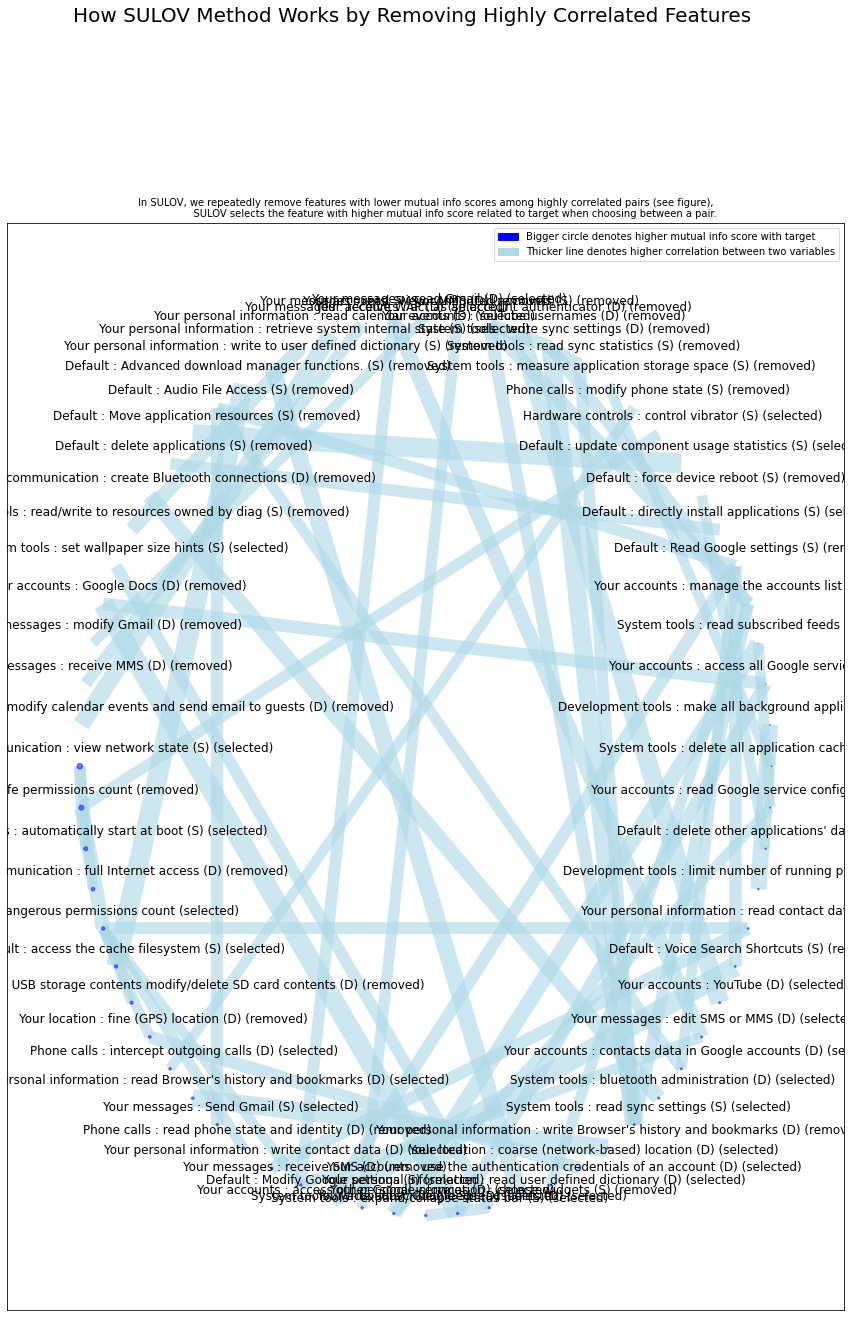

    Adding 0 categorical variables to reduced numeric variables  of 120
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 120 
    Finding Important Features using Boosted Trees algorithm...
        using 120 variables...
        using 96 variables...
        using 72 variables...
        using 48 variables...
        using 24 variables...
Selected 40 important features from your dataset
    Time taken (in seconds) = 47
Returning list of 40 important features and dataframe.


In [12]:
# Automatic feature selection by using featurewiz package
target = 'Class'
 
features, train = featurewiz(Refined_Data, target, corr_limit=0.5, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [13]:
print(features)

['Price', 'Number of ratings', 'Your location : mock location sources for testing (D)', "Your personal information : read Browser's history and bookmarks (D)", 'System tools : set wallpaper (S)', 'System tools : send sticky broadcast (S)', 'Services that cost you money : directly call phone numbers (D)', 'Hardware controls : test hardware (S)', 'Network communication : view network state (S)', 'Your messages : Read Email attachments (D)', "Default : delete other applications' data (S)", 'System tools : change network connectivity (D)', 'Rating', 'Default : power device on or off (S)', 'Your personal information : read calendar events (D)', 'System tools : change your UI settings (D)', 'Hardware controls : take pictures and videos (D)', 'Network communication : view Wi-Fi state (S)', 'Your accounts : access other Google services (D)', 'Network communication : receive data from Internet (S)', 'Your messages : receive WAP (D)', 'Your location : coarse (network-based) location (D)', 'Your 

In [14]:
# Split the target variable from the other variables
y = train.Class.values
X = train.drop(['Class'], axis = 1)


In [15]:
# Confirm the shape of X and y
print(y.shape)
print(X.shape)

(29795,)
(29795, 40)


In [16]:
# Preprocess the features using Standard Scaler
X_scaled =  StandardScaler().fit_transform(X)

# Modelling 

In [17]:
# Prepare models to compare their performance
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X_scaled, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.670817 (0.007119)
KNN: 0.698171 (0.005805)
CART: 0.717503 (0.005305)
RF: 0.735191 (0.006895)
XGB: 0.731969 (0.007172)
LGBM: 0.733143 (0.007964)


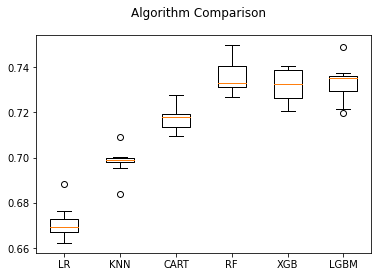

In [18]:
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled ,y, test_size = 0.2, stratify=y, random_state=42)

#Create model and check the performance
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train,y_train)

# Make prediction 
preds = classifier.predict(X_test) 

# Check performance
accuracy_score(preds,y_test) 


0.7276388655814734

# Model Tuning

From the above analysis, Random Forest is the preferred model for the dataset with an accuracy of 72.7%. The next steps are tuning the model to increase the accuracy.

# Hyperparameter Tuning

In [20]:
# Check the current hyperparameters for the Random Forest
from pprint import pprint
print('Parameters currently in use:\n')
pprint(classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [21]:
#Random Hyperparameter Grid

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [22]:
# Use the random search grid to search for best hyperparameters
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
classifier_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, 
                                       n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
classifier_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, verbose=2)

In [23]:
# Find the best hyperparameters
classifier_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [24]:
#Fit the model to the best estimators
best_classifier = classifier_random.best_estimator_
best_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=250,
                       random_state=42)

In [25]:
# Make prediction
best_preds = best_classifier.predict(X_test) 

# Check performance
accuracy_score(best_preds,y_test) 


0.7405604967276389

# Summary from Hyperparameter Tuning

The hyperparameter tuning improved the accuracy of the model by 1%. The parameters that were changed are:


*   The maximum depth of the tree was 20.
*   The maximum features was the square root of the total number of features in each run.

*   The number of trees was 250.
*   The minimum leaf size was 2.

*   The minimum number of observations was 2.








# Model Explainability (Explainable AI)

In [26]:
pip install shap

     |████████████████████████████████| 356 kB 23.4 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491656 sha256=c3e8c7eed85d97ce8e65d8966a962b70e791380d272f1a2e3731153e15cd0e8d
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [27]:
#Import shap library
import shap

In [30]:
explainer = shap.TreeExplainer(best_classifier)

In [31]:
#Initialize shap
shap_values = explainer.shap_values(X_test)

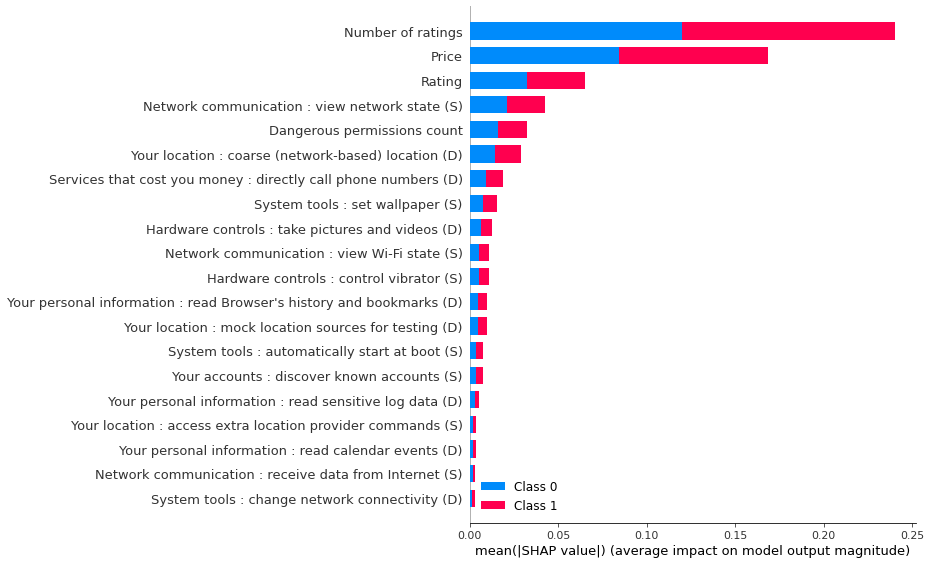

In [33]:
shap.summary_plot(shap_values, X_test, feature_names=features)

# Observations

The top 3 features that greatly influences the target, i.e to tell whether an Android App is benign are:


*   Number of ratings
*   Price
*   Rating

The dependence plots shows how the selected features interact with the target variable and it also shows which other feature it interacts with mostly. From the selected top 3 features, the dangerous permission count interacts with 2 of the top 3 showing it's an important feature to monitor.

The rating is the only feature that shows a linear elationship with the target.

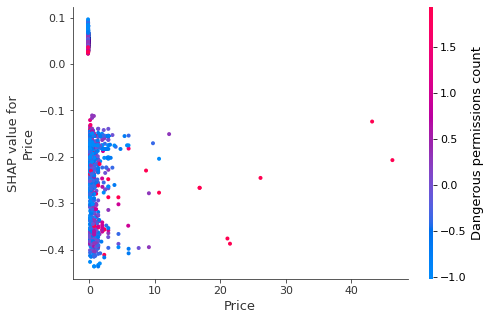

In [38]:
shap.dependence_plot("Price", shap_values[0], X_test, feature_names=features)

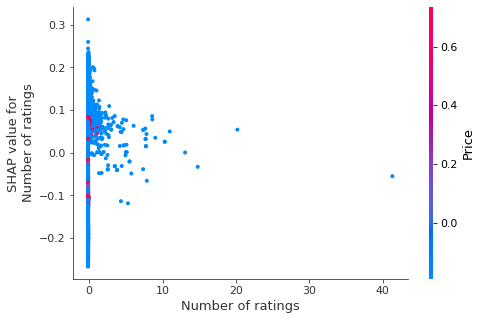

In [39]:
shap.dependence_plot("Number of ratings", shap_values[0], X_test, feature_names=features)

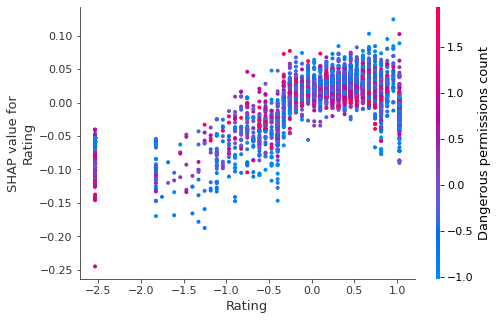

In [41]:
shap.dependence_plot("Rating", shap_values[0], X_test, feature_names=features)

In [ ]:
#shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
